### Logistic Regression Assignments
Problem Statement:

Output variable -> y

y -> Whether the client has subscribed a term deposit or not 

Binomial ("yes" or "no")

In [1]:
#Loading the Required Library
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Load the data set
bank = pd.read_csv("C:/Users/Akaash/Downloads/bank-full.csv", delimiter = ";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Checking Null Value
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Inference: No NA Value, AlsoDatasets Has X as well as the Y Variable Categorial, So for Y variable Using Label Encoder then for X Variable will Use Dummies

In [4]:
#Complete Bank dataset - applying lable encoder to species column - (Y Variable is Categorial)
label_encoder = preprocessing.LabelEncoder()
bank['y'] = label_encoder.fit_transform(bank['y']) 
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [5]:
#Dummies for X Variable
bank = pd.get_dummies(bank)
bank.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Inference: All the Variables are now Numberical

#### Building Logistic Regression Model

In [6]:
# Dividing our data into input and output variables 
X = pd.concat([bank.iloc[:,0:7],bank.iloc[:,8:]],axis = 1)
Y = bank.iloc[:,7]

In [7]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [8]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

Inference: These are the class for Y Variable (Y_hat)/(Predicted Values)

In [9]:
#Probability
y_pred_prob = classifier.predict_proba(X)
y_pred_prob

array([[0.96400516, 0.03599484],
       [0.97882189, 0.02117811],
       [0.98250935, 0.01749065],
       ...,
       [0.30540913, 0.69459087],
       [0.91407646, 0.08592354],
       [0.86072685, 0.13927315]])

Inference: These are the Probability of Y Variable (Y_hat)/(Predicted Values)

In [10]:
#Creating Dataframe of Actual and Predicted values for Y, (Y,Y_hat)
y_pred_df= pd.DataFrame({'actual_Y': Y,'predicted_Y': classifier.predict(X)})
y_pred_df

,actual_Y,predicted_Y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


Inference: This Give the Actual_Y & Predicted_Y side by side

In [11]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39120   802]
 [ 4074  1215]]


Inference: The Diagonal value(39120,1215) are the Correctly Predicted Values i.e TP, TN

In [12]:
#Calculating Accuracy 
#TP+TN / TP + FP + FN + TN
((39120+1215)/(39120+802+4074+1215))*100

89.21501404525446

Inference: The Final Accuracy of the Model is 89.21

In [13]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.23      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.64     45211
weighted avg       0.87      0.89      0.87     45211



Inference: In the above Report we can see the Precision, Recall and F1-Scores Value

#### ROC Curve

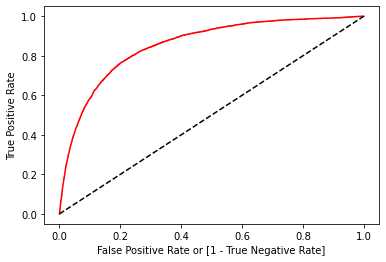

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [15]:
#Area Under the Curve
auc

0.6048164453867118

Inference: The Area Under the Curve For this Problem is 0.60

#### Cross Validation -- K-Folds

In [16]:
#Importing the Required Libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Creating K-Fold Instance
num_folds = 5
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)

#Predicting & Getting the Model Score with kfold
results = cross_val_score(classifier, X, Y, cv=kfold)

In [17]:
# Accuracy for Each K-Fold
results

array([0.89704744, 0.8915063 , 0.88420703, 0.8892944 , 0.89316523])

In [18]:
#Average of All k-fold Accuracy to get Final model Accuary
results.mean()*100.0

89.10440821181153

##### Inference: The Final Accuracy Based on K-Fold Cross Validation is 89.10